In [1]:
# Import modules and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (13,10)
plt.style.use('bmh')
from datetime import timedelta
from keras.models import *
from keras.layers import *
from sklearn.preprocessing import *
import seaborn as sns
from sklearn.metrics import *
from keras.callbacks import *
%matplotlib inline

In [2]:
def preprocess(file):
    data = pd.read_csv(file)
    HUElec = pd.melt(data, id_vars=["Date"], var_name='time')
    HUElec['time'] = pd.to_timedelta(HUElec['time'].apply(lambda t: f"{t[:5]}:00")) - timedelta(minutes=30)
    HUElec['Date'] = pd.to_datetime(HUElec['Date'], format="%m/%d/%Y")
    HUElec['Datetime'] = HUElec['Date'] + HUElec['time']
    HUElec = HUElec.set_index('Datetime')
    HUElec = HUElec.drop(['Date', 'time'], axis=1).sort_index()

    return HUElec

In [3]:
building = 'GTWY'
rule = 'D'
type = 'Daily'

In [6]:
file = 'C:\\Users\\moham\\OneDrive - De Montfort University\\Final Project\\Master_Thesis\\Dataset\\'+building+'Elec.csv'
data = preprocess(file)

data = data.resample(rule=rule).mean().copy()

data = data.rename(columns={'value': 'Electric'})

print(len(data))

data.fillna(method='ffill',  inplace=True)

data.head()

5046


,Electric
Datetime,
2008-05-07,14.376250
2008-05-08,26.581708
2008-05-09,25.487375
2008-05-10,11.273500
2008-05-11,11.583042


In [7]:
data.isna().sum()

Electric    0
dtype: int64

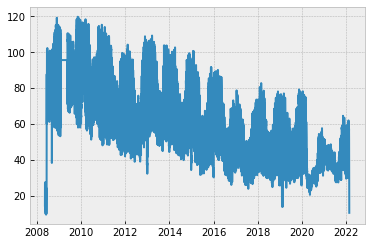

In [8]:
plt.plot(data)

In [9]:
file = 'C:\\Users\\moham\\OneDrive - De Montfort University\\Final Project\\Master_Thesis\\Dataset\\'+building+'Gas.csv'
data1 = preprocess(file)

data1 = data1.resample(rule=rule).mean().copy()

data1 = data1.rename(columns={'value': 'Gas'})

print(len(data1))

# data1.fillna(method='ffill',  inplace=True)

data1.head()

5046


,Gas
Datetime,
2008-05-07,3.434313
2008-05-08,5.891833
2008-05-09,5.702625
2008-05-10,3.796229
2008-05-11,3.796625


In [10]:
data1.isna().sum()

Gas    0
dtype: int64

In [13]:
file = 'C:\\Users\\moham\\OneDrive - De Montfort University\\Final Project\\Master_Thesis\\Dataset\\'+building+'Water.csv'
data2 = preprocess(file)

data2 = data2.resample(rule=rule).mean().copy()

data2 = data2.rename(columns={'value': 'Water'})

print(len(data2))

data2.fillna(method='ffill',  inplace=True)

data2.head()

5031


,Water
Datetime,
2008-05-23,0.102063
2008-05-24,0.001313
2008-05-25,0.001104
2008-05-26,0.002917
2008-05-27,0.004125


In [14]:
data2.isna().sum()

Water    0
dtype: int64

In [15]:
data = data.loc['2008-05-23':]
data1 = data1.loc['2008-05-23':]

new_data = data.join([data1,data2])

print(len(new_data))

new_data.head()

5030


,Electric,Gas,Water
Datetime,,,
2008-05-23,21.259812,4.716729,0.102063
2008-05-24,9.742125,4.643917,0.001313
2008-05-25,9.466250,4.789521,0.001104
2008-05-26,9.720917,4.913646,0.002917
2008-05-27,9.453167,4.650792,0.004125


In [17]:
new_data.tail()

,Electric,Gas,Water
Datetime,,,
2022-02-24,57.230000,90.713354,0.000000
2022-02-25,51.441667,92.109000,0.000000
2022-02-26,29.384167,3.954271,-0.000417
2022-02-27,29.038333,4.186875,0.000000
2022-02-28,10.345000,17.212292,0.000000


array([<AxesSubplot:xlabel='Datetime'>, <AxesSubplot:xlabel='Datetime'>,
       <AxesSubplot:xlabel='Datetime'>], dtype=object)

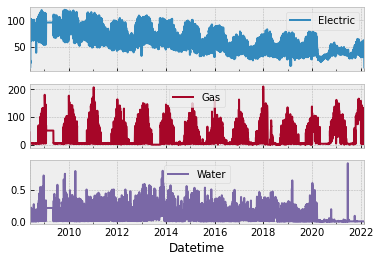

In [18]:
new_data.plot(subplots=True)

In [18]:
new_data.to_csv('C:\\Users\\moham\\OneDrive - De Montfort University\\Final Project\\Master_Thesis\\Dataset\\All_'+building+'_'+type+'_Dataset.csv')